<a href="https://colab.research.google.com/github/mikedcurry/Ebola-Web-App/blob/master/ebola_redcross_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Idea: feature importance anaylsis in determining infected communities in West Africa

[Source](https://data.humdata.org/dataset/american-red-cross-west-africa-project)

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly

     |████████████████████████████████| 92kB 5.9MB/s 
     |████████████████████████████████| 133kB 14.9MB/s 
     |████████████████████████████████| 7.1MB 46.1MB/s 
     |████████████████████████████████| 614kB 46.7MB/s 
     |████████████████████████████████| 225kB 40.5MB/s 
     |████████████████████████████████| 768kB 47.0MB/s 
     |████████████████████████████████| 194kB 62.9MB/s 
     |████████████████████████████████| 51kB 27.0MB/s 
     |████████████████████████████████| 51kB 26.3MB/s 
     |████████████████████████████████| 737kB 47.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=fcf8d9aac76b2bd43db69690d89aa5e9a8cbfaa129c4b0c8d523c962a67bed6e
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=3c2462b600abc9193badfcba09672bc73489adad86510f75facb42cac1d95867
  Stored

In [0]:
!pip install --upgrade category_encoders pandas-profiling plotly

In [0]:
import pandas as pd
import numpy as np

%matplotlib inline
import itertools
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Dictionary

In [0]:
pd.options.display.max_rows = 207
pd.options.display.max_rows

207

In [0]:

pd.options.display.max_colwidth = 200
pd.options.display.max_colwidth

In [0]:
# IMPORTANT: Dictionary of all terms in this Dataset:

df_dic = pd.read_excel('https://data.humdata.org/dataset/9e3665cb-e4a3-4749-9622-f5c8146542c3/resource/3c527bf4-88c1-4759-a29e-e8de42623680/download/readme_redcross_westafrica_datadictionary.xlsx')
df_dic

,Variable Name,Type,Format,Variable Label,Value Labels
0,~0_altvillage_1,str,%9.0g,Alternate village name 1,NaN
1,~1_altvillage_1,str,%9.0g,Alternate village name 2,NaN
2,~2_altvillage_1,str,%9.0g,Alternate village name 3,NaN
3,a~0_lt_sctr_rrl,str,%9.0g,Alternate sector name 1(rural),NaN
4,a~1_lt_sctr_rrl,str,%9.0g,Alternate sector name 2(rural),NaN
5,abancomm,str,%20.0g,Name of abandoned community (if known),NaN
6,adm4urb_def,str,%9.0g,So we can describe this area as 'Urban'. How would you describe the next administrative level.,NaN
7,adm4urban_name,str,%9.0g,What is the name of the adm4urb_def containing this particular community?,NaN
8,adm5urban_name,str,%9.0g,What 'Neighborhood' do we belong to here?,NaN
9,al~0_altvillage,str,%9.0g,Alternate village name 1 (Liberia),NaN


In [0]:
df['namevill'].nunique()

5577

In [0]:
df['name_village'].nunique()

1442

In [0]:
df['namevill'].isnull().sum()

618

In [0]:
# df[(df['namevill'].isnull) & (df['name_village'].isnull())]
df.namevill.fillna(df.name_village, inplace=True)
df['namevill'].isnull().sum()

377

In [0]:
df = df.dropna(subset=['namevill'])
df.shape

(6823, 207)

In [0]:
df.shape

(7200, 207)

## Begin df

In [0]:
# Target = 'commebola' --> 1/0
# 'ebola' is the number of infections

In [0]:
df = pd.read_csv('https://data.humdata.org/dataset/9e3665cb-e4a3-4749-9622-f5c8146542c3/resource/c99f90a6-8a3b-4bd0-a081-3bed5d70781f/download/redcross_westafrica_rapidassessment_survey.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,143,144,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,194,195,196,197,198,200,201,202,203) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.shape

(7200, 207)

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# 3-way split: 60-20-20

train1, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42) #stratify=df['ebola'],

# Need to duplicate target proportionate to # of infections (found in 'ebola')
# Check out: https://stackoverflow.com/questions/24029659/python-pandas-replicate-rows-in-dataframe

train, val = train_test_split(train1, train_size=0.75, test_size=0.25, 
                              random_state=42) #stratify=df['ebola'],



# A place to clean data...

def wrangle(X):
    # Wrangle train/val/test sets in the same way
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # Imputes single 9999995 value, change target to catagory
    X['commebola'] = X.commebola.replace(999995, 0)
    X['commebola'] = X['commebola'].astype('category')
    
    # Drop unhelpful or data leaking features
    droprs = ['ebola', 'relgo', 'religiousmatch'] # 'comm_dist' ?
    X = X.drop(columns=droprs)
    
    # Chopping off all features with Permutation Importance less than zero 
    columns = ['commebola', 'Unnamed: 0', 'X', 'hh_gps.latitude', 'hh_gps.longitude', 'marketclean',
       'marketcomsum', 'marketmatch', 'hh_gps.altitude', 'hhnum',
       'comm_dist_oth', 'drink_wat', 'water_time', 'toilet', 'floor',
       'treat_time', 'birth_main', 'birth_loc', 'birth_time', 'comm_health',
       'ch_or3_num', 'ch_or3_time', 'floor_oth', 'ch_or1_time', 'ch_or4_time',
       'ch_or2_num', 'ch_or2_time', 'mark_other', 'finalend', 'drought',
       'fire', 'distnone', 'othdist', 'clinunsp', 'trad', 'lgmoh', 'RedCross',
       'cHWComm', 'WorkOth', 'fruit', 'wednesday', 'thursday', 'friday',
       'saturday', 'whmatch', 'relclean', 'instanceName', 'deviceId',
       'namevillage.1.altvillage', 'loc_adm1', 'loc_adm2', 'URBAN_OR_RURAL',
       'OTHER_DETAILS',  'treat_mult', 'birth_mult', 'marktype',
       'markday', 'border_crossing_type', 'border_crossing_name',
       'border_crossing_dest', 'epidemic_specifics', 'treat_loc_specify',
       'birmatron', 'loc_adm3', 'loc_adm4', 'District', 'Secteur_Rural',
       'name_village', 'name_part_village', 'QUARTIER_OU_DISTRICT',
       'alts_secteur_rurale.0.alt_secteur_rurale',
       'names_part_village.4.alt_part_village', 'alt_secteur_urbain', 'date',
       'alts_village.0.altvillage.1', 'alts_village.2.altvillage.1',
       'constituency', 'gsm_service', 'birhome', 'instanceId', 'namevill', 'name_village'] #'comm_dist',
    X = X[columns]
    

    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

print(train.shape)
print(val.shape)
print(test.shape)

# Worked out such that both val and test are the same size...

(4320, 82)
(1440, 82)
(1440, 82)


In [0]:
test['commebola'].value_counts()

0    1378
1      62
Name: commebola, dtype: int64

In [0]:
# Arrange data into X features matrix and y target vector

target = 'commebola'

X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4320, 81)
(1440, 81)
(1440, 81)
(4320,)
(1440,)
(1440,)


In [0]:
# Save the instanceId for later, so we can look up actual results,
# to compare with predicted results

train_id = X_train['instanceId']
val_id = X_val['instanceId']
test_id = X_test['instanceId']

X_train = X_train.drop(columns='instanceId')

X_val = X_val.drop(columns='instanceId')

X_test = X_test.drop(columns='instanceId')

    
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4320, 80)
(1440, 80)
(1440, 80)


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [0]:
# Baseline Random Forest

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1,
                          )
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Remember that accuracy doesn't mean much here: 99.5% of communities were not infected...

AttributeError: ignored

### Confusion Matrices Threshold set interactive

In [0]:
# Low Tech simple confusion matrix 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

y_pred = pipeline.predict(X_val)
confusion_matrix(y_val, y_pred)

array([[1368,    2],
       [  49,   21]])

In [0]:
# First we 'need' to get labels (so it's pretty at the end...)
from sklearn.utils.multiclass import unique_labels
print(unique_labels(y_val))

# Output from unique_labels matches our model's classes_ attributed
pipeline.named_steps['randomforestclassifier'].classes_

# Make sure these two sets of labels match...

[0 1]


array([0, 1])

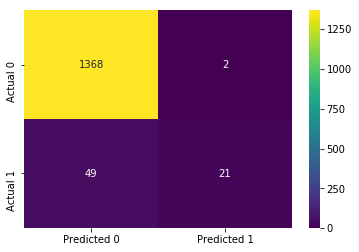

In [0]:
# Plot a confusion matrix heatmap Ta-Da!
 
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [0]:
# recall is REALLY bad:
21/70

0.3

In [0]:
# created that fantastic table that includes precision & recall
# (quick and dirty)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1370
           1       0.91      0.30      0.45        70

    accuracy                           0.96      1440
   macro avg       0.94      0.65      0.72      1440
weighted avg       0.96      0.96      0.96      1440



In [0]:
# ... get probabilities:
pipeline.predict_proba(X_val)

array([[0.99, 0.01],
       [0.97, 0.03],
       [0.88, 0.12],
       ...,
       [0.97, 0.03],
       [0.98, 0.02],
       [0.84, 0.16]])

In [0]:
# Just get column with index 1
y_pred_proba = pipeline.predict_proba(X_val)[:,1]
y_pred_proba

array([0.01, 0.03, 0.12, ..., 0.03, 0.02, 0.16])

False    1214
True      226
dtype: int64

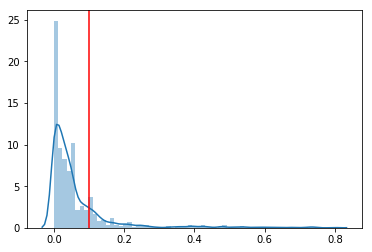

In [0]:
# Visualizing default 50% threshold

threshold = 0.10
ax = sns.distplot(y_pred_proba, bins=65)
ax.axvline(threshold, color='red')

y_pred = y_pred_proba > threshold
pd.Series(y_pred).value_counts()

# hmm...

In [0]:
# Just get column with index 1
y_pred_proba = pipeline.predict_proba(X_val)[:,1]
y_pred_proba

array([0.01, 0.03, 0.12, ..., 0.03, 0.02, 0.16])

In [0]:
# Just get column with index 1
y_pred_proba = pipeline.predict_proba(X_val)[:,1]

threshold = 0.1
y_pred = y_pred_proba > threshold
pd.Series(y_pred).value_counts()

False    1214
True      226
dtype: int64

In [0]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt



def set_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba > threshold
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.show()
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    
interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05));



interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

### Experimenting with XGBClassifier

In [0]:
# Baseline with XGBClassifier

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Running it on original set
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimator=100, random_state=7, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.9534722222222223


### Feature Importance



In [0]:
# Get feature importances from the middle of the pipeline above

# named_steps is the trick... maybe also why Herr always breaks the whole process down...
rf = pipeline.named_steps['randomforestclassifier']  

# Not totally sure how he figured this out...
importances = pd.Series(rf.feature_importances_, X_train.columns)

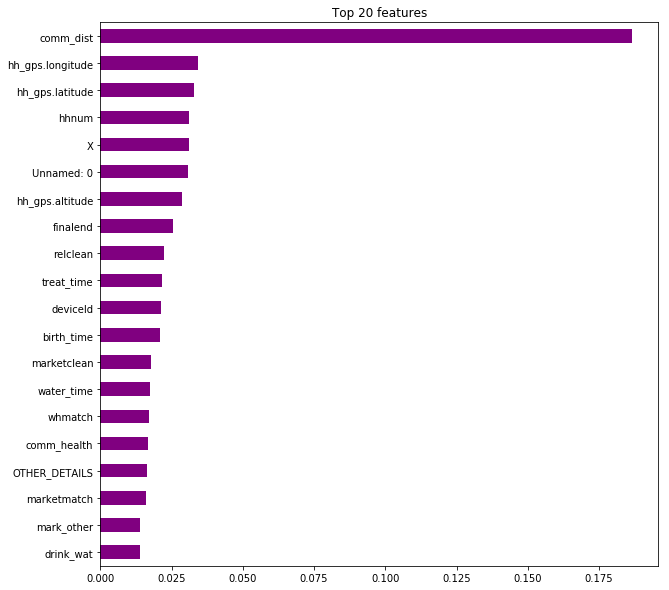

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='purple');

# BELOW WILL BE A PRETTY HORIZONTAL BAR PLOT

### Exploration / Identify Cleaning Needs

In [0]:
# 'comm_dist' is "What disasters has your community experienced since Ebola outbreak?"

# Strongly suspect that something in this feature is leaking target information... 
# ... probably one of the codes is infection of ebola or death, etc. 

# Dont' know what any of these codes mean. Need to dig deeper in the documenation 

train['comm_dist'].value_counts()

# Documentation on disaster score implies that this may include Ebola infections in the community. Not totally certain. 
# https://data.humdata.org/dataset/9e3665cb-e4a3-4749-9622-f5c8146542c3/resource/4ada0932-0f97-4021-90b1-8ade202a794e/download/redcross_westafrica_detailedmethodology_report.pdf

In [0]:
#####################################################################
# NOTE: Simple Imputer was droping 2 columns. One's with all NaNs   #
#####################################################################

# Need to drop 'relgo', 'religiousmatch'

In [0]:
train.shape

(4320, 207)

In [0]:
train.isnull().sum().sort_values(ascending=False)

In [0]:
# checking number of rows
320+1440+1440

7200

In [0]:
print(train['commebola'].value_counts())
print(val['commebola'].value_counts())
print(test['commebola'].value_counts())


0    4149
1     171
Name: commebola, dtype: int64
0         1369
1           70
999995       1
Name: commebola, dtype: int64
0    1378
1      62
Name: commebola, dtype: int64


In [0]:
train['ebola'].describe()

count      4320.000000
mean     953716.100926
std      210075.098167
min           0.000000
25%      999995.000000
50%      999995.000000
75%      999995.000000
max      999999.000000
Name: ebola, dtype: float64

In [0]:
train['ebola'].value_counts()

999995    3362
999999     758
1           61
3           24
2           23
4           14
5           14
7            9
6            8
10           7
9999         7
8            5
17           3
9            3
11           2
15           2
12           2
13           2
40           1
28           1
16           1
36           1
20           1
49           1
41           1
22           1
30           1
50           1
27           1
31           1
35           1
0            1
Name: ebola, dtype: int64

In [0]:
# X = df.drop('commebola',axis='columns')
# y = df['commebola']

In [0]:
test['commebola'].value_counts()

0    1378
1      62
Name: commebola, dtype: int64

In [0]:
test['ebola'].value_counts()

999995    1123
999999     248
1           17
2           13
3            7
4            5
5            4
9999         3
22           3
7            2
20           2
11           2
8            2
6            1
18           1
23           1
25           1
27           1
28           1
101          1
200          1
0            1
Name: ebola, dtype: int64

In [0]:
df.head(2)

,Unnamed: 0,X,hh_gps.latitude,hh_gps.longitude,namevill,market,marketclean,marketcomsum,marketmatch,instanceId,hh_gps.altitude,hh_gps.precision,hhnum,comm_dist_oth,drink_wat,water_time,toilet,floor,treat_main,treat_loc,treat_time,birth_main,birth_loc,birth_time,comm_health,ch_or3_num,ch_or3_time,markout,markcomm,worship,worshiploc,floor_oth,ch_or1_num,ch_or1_time,ch_mult_oth,ch_or4_num,ch_or4_time,ch_or2_num,ch_or2_time,mark_other,ebola,finalstart,finalend,country,drought,famine,flooding,landslides,fire,commebola,disease,distnone,othdist,hosgov,hosfor,hosngo,hosunsp,clingov,clinfor,clinngo,clinunsp,chw,trad,hospri,midwife,friends,unsp,healthnone,healthref,healthdk,birhosgov,birhosfor,birhosngo,birhosunsp,birclingov,birclinfor,birclinngo,birclinunsp,birchw,birtrad,birhospri,birmidwife,birfriends,birnone,birref,birdk,lgmoh,RedCross,cHWComm,Noworkers,WorkOth,WorkersRef,WorkersDK,noschool,primary,secondary,vocational,university,postgrad,meat,poultry,fish,fruit,vegetables,marketother,monday,tuesday,wednesday,thursday,friday,saturday,sunday,everyday,dayref,daydk,whsum,whmatch,relclean,relgo,religiousmatch,treatmentsum,treatmatch,finalindex,instanceName,formId,deviceId,submissionTime,namevillage.0.altvillage,namevillage.1.altvillage,namevillage.4.altvillage,namevillage.6.altvillage,loc_adm1,loc_adm2,URBAN_OR_RURAL,OTHER_DETAILS,comm_dist,treat_mult,birth_mult,share_emerge_contact,educ,marktype,markday,comment,border_crossing,border_crossing_type,border_crossing_name,border_crossing_dest,epidemic_specifics,toilet_oth,drink_wat_oth,inhabited,treat_loc_specify,birth_loc_specify,abancomm,poste,matron,birposte,birmatron,schoolrefdk,markettyperefdk,markstall,osmsurvey,numhealth,region,schoolref,schooldk,loc_adm3,loc_adm4,District,Secteur_Rural,name_village,name_part_village,alt_secteur_rurale,QUARTIER_OU_DISTRICT,SECTEUR_URBAIN,name_carre,names_part_village.alt_part_village,names_part_village.0.alt_part_village,names_part_village.1.alt_part_village,names_part_village.2.alt_part_village,names_part_village.3.alt_part_village,altvillage,version,alts_secteur_rurale.0.alt_secteur_rurale,alts_secteur_rurale.1.alt_secteur_rurale,alts_village.0.altvillage,alts_village.1.altvillage,alts_village.2.altvillage,names_part_village.4.alt_part_village,names_part_village.5.alt_part_village,names_part_village.6.alt_part_village,alt_secteur_urbain,date,prev_interview,alts_village.0.altvillage.1,alts_village.1.altvillage.1,alts_village.2.altvillage.1,constituency,ward,gsm_service,gsm_distance,adm4urb_def,adm4urban_name,adm5urban_name,treathome,birhome,marketout
0,1,1,7.212947,-9.097043,KOhoui,Marché de Sopa,Soopa,0,uuid:9490fa12-2313-44cd-8aaa-007d845c1062,uuid:853dbd86-4aae-4454-801d-9461bd6883dc,290.5,1.0,45,NaN,3,20,10,1,6,2,60,6,2,60,2 3 4,6,3,2,Sopa,2,Sopa,NaN,999995,999995,NaN,999995,999995,5,3,"Riz ,condiment",999995,5/25/2016 13:10,5/25/2016 13:30,Guinea,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,uuid:9490fa12-2313-44cd-8aaa-007d845c1062,Sopa,NaN,NaN,0,uuid:9490fa12-2313-44cd-8aaa-007d845c1062,21,Guinee_Sondage_Communautaire_V1-4-7,Guinee_Sondage_Communautaire_V1-4-7,imei:357835070414055,2016-05-25T14:35:38.426Z,999995,999995,999995,999995,guinee_forestiere,nzerekore,2,Dernier village avant la frontière,1 2,3 5,3 5,999995,1,1 2 3 4 5 97,7,RAS,1,2,Frontière kohoui,Tonwi,NaN,NaN,NaN,1,Sopa,Sopa,NaN,0,0,0,0,0,0,999995,999995,999995,999995,999995,999995,yomou,diecke,Sopa,KOhoui,995,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V1-4-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/25/2016,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995
1,2,2,7.225922,-9.049043,Nimpa,Marché de Soopa,Soopa,0,uuid:9490fa12-2313-44cd-8aaa-007d845c1062,uuid:5f4bc8d4-c42c-4eb5-83bc-2c98d17bcee1,275.4,1.5,160,NaN,3,90,10,1,6,2,60,14,1,10,2 3 4,3,3,2,Soopa,1,NaN,NaN,999995,999995,NaN,999995,999995,5,3,Condiment,999995,5/25/2016 11:38,5/25/2016

In [0]:
df.shape

(7200, 207)

In [0]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
pd.options.display.max_seq_items = 200

In [0]:
# Looking at all catigorical features, cardinality in descending order

all_cats.sort_values(ascending=False)

In [0]:
# df.isnull().sum()

nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

namevill                                     618
market                                       924
comm_dist_oth                               6677
comm_health                                 1324
markcomm                                    1683
worshiploc                                  5201
floor_oth                                   7044
ch_mult_oth                                 6605
mark_other                                  4382
whmatch                                      183
relgo                                       7200
religiousmatch                              7200
treatmatch                                   170
namevillage.0.altvillage                    3700
namevillage.1.altvillage                    3764
namevillage.4.altvillage                    3774
namevillage.6.altvillage                    1328
loc_adm1                                     582
loc_adm2                                     583
OTHER_DETAILS                                820
comm_dist           

In [0]:
df['commebola'].value_counts()

0         6896
1          303
999995       1
Name: commebola, dtype: int64

### Permutation Importance:

In [0]:
# # NOTE: I have to split up the model pipeline to get to feature importances

# 1st make a pipeline just for Ordinal Encoding, and imputing NaNs
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

# 2nd run train and val through 1st Pipeline
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

# Declare a model, and fit it to the above transformed features (normal process, but split appart)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

AttributeError: ignored

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
# Looking at permutation imporance ranked in order with color-shading...

# SPECIAL NOTE: we had to split appart the process to run the transformed data
#               through BOTH the permuter and the model

# !pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# 1st  Herr-style declaring a function
permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

# 2nd fitting the transformed data to the permuter
permuter.fit(X_val_transformed, y_val)

# Creating a list of feature names to match permuter list
feature_names = X_val.columns.tolist()

#eli5.show_weights?
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features (can declare a top n )
    feature_names=feature_names
)

Using TensorFlow backend.


Weight,Feature
0.0181 ± 0.0000,comm_dist
0.0028 ± 0.0014,Unnamed: 0
0.0021 ± 0.0014,hh_gps.latitude
0.0021 ± 0.0014,hh_gps.longitude
0.0021 ± 0.0014,treat_time
0.0017 ± 0.0007,X
0.0017 ± 0.0021,ch_or2_num
0.0014 ± 0.0014,deviceId
0.0010 ± 0.0007,othdist
0.0010 ± 0.0007,name_village


In [0]:
# Here's where we chop it...

minimum_importance = 0
mask = permuter.feature_importances_ > 0

features1 = X_train.columns[mask] # find new features that meet that meet criteria

X_train1 = X_train[features1]     # create a new X_train set with these features
X_val1 = X_val[features1]         #   same for validation X set
X_test1 = X_test[features1] 

# Compare shape to un-chopped
X_train1.shape

# Looks like it smaller...

(4320, 79)

In [0]:
X_train1.columns

Index(['Unnamed: 0', 'X', 'hh_gps.latitude', 'hh_gps.longitude', 'marketclean',
       'marketcomsum', 'marketmatch', 'hh_gps.altitude', 'hhnum',
       'comm_dist_oth', 'drink_wat', 'water_time', 'toilet', 'floor',
       'treat_time', 'birth_main', 'birth_loc', 'birth_time', 'comm_health',
       'ch_or3_num', 'ch_or3_time', 'floor_oth', 'ch_or1_time', 'ch_or4_time',
       'ch_or2_num', 'ch_or2_time', 'mark_other', 'finalend', 'drought',
       'fire', 'distnone', 'othdist', 'clinunsp', 'trad', 'lgmoh', 'RedCross',
       'cHWComm', 'WorkOth', 'fruit', 'wednesday', 'thursday', 'friday',
       'saturday', 'whmatch', 'relclean', 'instanceName', 'deviceId',
       'namevillage.1.altvillage', 'loc_adm1', 'loc_adm2', 'URBAN_OR_RURAL',
       'OTHER_DETAILS', 'comm_dist', 'treat_mult', 'birth_mult', 'marktype',
       'markday', 'border_crossing_type', 'border_crossing_name',
       'border_crossing_dest', 'epidemic_specifics', 'treat_loc_specify',
       'birmatron', 'loc_adm3', 'loc_ad

In [0]:
######################################################################
# DATA CLEANING NOTE: COME BACK AND CHOP BASED UPON PERM IMPORTANCES #
######################################################################

# done.

In [0]:
# We can run the model again with the Chopped set and see how it goes...

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train1, y_train)
print('Validation Accuracy', pipeline.score(X_val1, y_val))

Validation Accuracy 0.96875


### Shapley Value Plots

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(               # Needs to be a numeric df to run into Shapley Value Force plot below
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

AttributeError: ignored

In [0]:
# check ROC AUC in leu of accuracy

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))


Test ROC AUC: 0.9829228896483918


In [0]:

df_try = pd.DataFrame({
    'instanceId': test_id,       # Taken out early on, unique ids for each instance
    'pred_proba': y_pred_proba,  # array of predicted probabilities (hopefully still in order...)
    'status_group': y_test       # Actaul y values (in this case 1/0 infected community status)
})


# including the largest feature perm feature imporantances to compare...
df_try = df_try.merge(           # made a clean df with predicted vs actual, now adding features back in?
     df[['instanceId', 'comm_dist', 'ebola', 'namevill', 'name_village','hhnum','hh_gps.latitude', 'hh_gps.longitude', 'Unnamed: 0', 'treat_time', 'X', 'ch_or2_num'
         , 'deviceId', 'othdist', 'whmatch', 'thursday', 'drought']],       
     how='left'
)

df_try.head(3)


,instanceId,pred_proba,status_group,comm_dist,ebola,namevill,name_village,hhnum,hh_gps.latitude,hh_gps.longitude,Unnamed: 0,treat_time,X,ch_or2_num,deviceId,othdist,whmatch,thursday,drought
0,uuid:05aae4b6-cec8-4f80-b66d-99b6e29aed64,0.001118,0,2,999995,Kounata,Kounata,24,10.008140,-11.917657,3099,480,3099,999995,imei:357835070231889,0,999995,1,0
1,uuid:7791dc84-0238-45ec-b063-659cb02ad383,0.001456,0,2,999995,Foreboreah,995,60,9.458888,-10.775790,2532,5,2532,999995,imei:357835070234305,0,999995,0,0
2,uuid:f987e709-4784-4620-8968-0d17f12e9c8c,0.005079,0,999995,999999,Rachel village,999995,5,7.918152,-9.524810,4072,170,4071,999999,imei:357835070231269,0,uuid:dfe2bbd3-a02f-46d8-b097-db438218a091,0,0


In [0]:
df_try.shape

(1440, 17)

0.0181 ± 0.0000	comm_dist
0.0028 ± 0.0014	Unnamed: 0
0.0021 ± 0.0014	hh_gps.latitude
0.0021 ± 0.0014	hh_gps.longitude
0.0021 ± 0.0014	treat_time
0.0017 ± 0.0007	X
0.0017 ± 0.0021	ch_or2_num
0.0014 ± 0.0014	deviceId
0.0010 ± 0.0007	othdist
0.0010 ± 0.0007	name_village
0.0010 ± 0.0007	whmatch
0.0010 ± 0.0021	thursday
0.0007 ± 0.0000	drought
0.0007 ± 0.0014	WorkOth
0.0007 ± 0.0000	fruit
0.0007 ± 0.0000	gsm_service
0.0007 ± 0.0000	mark_other
0.0007 ± 0.0000	instanceName
0.0007 ± 0.0014	URBAN_OR_RURAL
0.0007 ± 0.0014	distnone

In [0]:
infected_comm = df_try['status_group'] == 1
no_ebola_comm = ~infected_comm
correct = (infected_comm) == (df_try['pred_proba'] > 0.10)
wrong = ~correct

In [0]:
# Top 5 highest probabilities with correctly predicted as infected

df_try[infected_comm & correct].sort_values(by='pred_proba', ascending=False).head(5)

,instanceId,pred_proba,status_group,comm_dist,ebola,namevill,name_village,hhnum,hh_gps.latitude,hh_gps.longitude,Unnamed: 0,treat_time,X,ch_or2_num,deviceId,othdist,whmatch,thursday,drought
166,uuid:f9fe36d0-b1fe-4f94-8b68-2a7bd638c58e,0.968943,1,2 6,4,Oremai,Oremai,100,8.459285,-9.434117,545,10,545,12,imei:357835070412877,0,uuid:db788574-a29e-4b23-b520-fb7e49535b7c,1,0
543,uuid:252a9e6a-e1a3-4ca1-8193-ab81067ea201,0.966027,1,6,5,Gbalamuya,999995,1000,9.172255,-12.954763,6595,10,6594,8,imei:357835070439326,0,uuid:252a9e6a-e1a3-4ca1-8193-ab81067ea201,0,0
1199,uuid:9631db27-3c10-4dde-a76a-df8e8147f0ab,0.961329,1,6,20,Baimoi luma,999995,4100,9.037150,-12.905512,6413,18,6412,5,imei:357835070228307,0,uuid:9631db27-3c10-4dde-a76a-df8e8147f0ab,1,0
926,uuid:4ebe198e-ceb0-49fa-98b2-1fa4224eba69,0.958575,1,6,6,Robat,999995,155,9.031670,-12.966743,6399,120,6398,6,imei:357835070439326,0,uuid:1beed664-06e6-4fc8-95ec-6b3ff8e9b298,1,0
763,uuid:3dee7c01-ac88-43bc-9237-a0f12e964c87,0.956090,1,2 6,3,Kindoye centre,Kindoye centre,35,9.351752,-13.132567,2349,10,2349,999,imei:357835070228869,0,uuid:3dee7c01-ac88-43bc-9237-a0f12e964c87,1,0


In [0]:
df_try[infected_comm & wrong].sort_values(by='pred_proba', ascending=True).head(5)

,instanceId,pred_proba,status_group,comm_dist,ebola,namevill,name_village,hhnum,hh_gps.latitude,hh_gps.longitude,Unnamed: 0,treat_time,X,ch_or2_num,deviceId,othdist,whmatch,thursday,drought
955,uuid:68a653de-531f-42c8-b1f3-f33ed82ee868,0.022001,1,999995,1,Peivalor,999995,18,6.955980,-11.335237,3461,130,3460,999999,imei:357835070214372,0,999999,0,0
1110,uuid:9b897213-c2e3-40e5-9778-123bb0227763,0.037372,1,999995,2,Bandenin melimu,999995,30,8.501207,-10.057973,4739,480,4738,999999,imei:357835070234412,0,999999,0,0
508,uuid:dbd05cfa-08dc-41ba-a5aa-59d3ab4dab99,0.066089,1,999995,1,Kambo,999995,22,8.410598,-10.205995,4557,25,4556,6,imei:357835070227721,0,999999,0,0
1285,uuid:23f03c90-abea-442c-8633-d60716a8c40e,0.066128,1,999995,5,Kpassagizia Town,999995,1600,8.015177,-9.439665,4109,360,4108,2,imei:357835070231269,0,uuid:1b000c95-9f3d-48e8-9777-0821b7ec69ef,0,0
516,uuid:f5e2d41d-f7f8-445b-9971-1988f394a54f,0.070862,1,999995,2,Savalahun Town,999995,375,8.333827,-10.148485,4395,60,4394,2,imei:357835070234420,0,uuid:d6c9d140-ddb6-4d6d-9ec0-b982a405aa36,0,0


In [0]:
!pip install shap

     |████████████████████████████████| 235kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.29.3-cp36-cp36m-linux_x86_64.whl size=344730 sha256=cce5e0c5bd4ae06c06f30a8200d651ec807bd96664ec9a41e541978f607cfcbe
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built shap


In [0]:
X_test.head(3)

,Unnamed: 0,X,hh_gps.latitude,hh_gps.longitude,marketclean,marketcomsum,marketmatch,hh_gps.altitude,hhnum,comm_dist_oth,drink_wat,water_time,toilet,floor,treat_time,birth_main,birth_loc,birth_time,comm_health,ch_or3_num,ch_or3_time,floor_oth,ch_or1_time,ch_or4_time,ch_or2_num,ch_or2_time,mark_other,finalend,drought,fire,distnone,othdist,clinunsp,trad,lgmoh,RedCross,cHWComm,WorkOth,fruit,wednesday,thursday,friday,saturday,whmatch,relclean,instanceName,deviceId,namevillage.1.altvillage,loc_adm1,loc_adm2,URBAN_OR_RURAL,OTHER_DETAILS,comm_dist,treat_mult,birth_mult,marktype,markday,border_crossing_type,border_crossing_name,border_crossing_dest,epidemic_specifics,treat_loc_specify,birmatron,loc_adm3,loc_adm4,District,Secteur_Rural,name_village,name_part_village,QUARTIER_OU_DISTRICT,alts_secteur_rurale.0.alt_secteur_rurale,names_part_village.4.alt_part_village,alt_secteur_urbain,date,alts_village.0.altvillage.1,alts_village.2.altvillage.1,constituency,gsm_service,birhome
3098,3099,3099,10.008140,-11.917657,Patheya,0,uuid:3ed10982-ba8e-4da7-a7db-b1c4cb03b04f,287.9,24,NaN,8,40,10,1,480,6,2,480,95,999995,999995,NaN,999995,999995,999995,999995,"L'huile, le riz,.....",5/12/2016 20:16,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,999995,Kounata,Guinee_Sondage_Communautaire_V1-4-7,imei:357835070231889,999995,moyenne_guinee,mamou,2,"Après bertheya,korkori,M'bendya et Marala on p...",2,11,14 15,1 2 3 4 5 97,4,1,Dantoumania pose,Kambia,NaN,Farinta,1,mamou,soyah,Farinta,Patheya,Kounata,995,NaN,NaN,NaN,NaN,5/12/2016,999995,999995,999995,999995,999995
2531,2532,2532,9.458888,-10.775790,Foreboreah,1,uuid:7791dc84-0238-45ec-b063-659cb02ad383,493.1,60,NaN,3,30,10,3,5,16,1,10,4,999995,999995,NaN,999995,999995,999995,999995,NaN,5/24/2016 19:05,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,999995,Foreboreah,Guinee_Sondage_Communautaire_V1-4-7,imei:357835070234305,999995,haute_guinee,faranah,2,NaN,2,5,5,1 2 3 4 5,6,2,Felko,Morobordou,NaN,NaN,0,faranah,banian,Kossaba,Foreboreah,995,995,NaN,NaN,NaN,NaN,5/24/2016,999995,999995,999995,999995,999995
4071,4072,4071,7.918152,-9.524810,Konia Market,0,uuid:dfe2bbd3-a02f-46d8-b097-db438218a091,368.5,5,NaN,7,30,3,1,170,6,2,170,1,999999,999999,NaN,1,999999,999999,999999,Rice,2016-03-24 16:49:38,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,uuid:dfe2bbd3-a02f-46d8-b097-db438218a091,Zuwulor Town,Liberia_Community_Survey_v18,imei:357835070231269,NaN,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995


In [0]:
!pip install shap

     |████████████████████████████████| 235kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.29.3-cp36-cp36m-linux_x86_64.whl size=344728 sha256=a3865f346cde12273e6d1ef92a9d05e585727647bdba1643247fcaef8a4019e4
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built shap


In [0]:
# If I want to look at a particular row / picked one at random to check my function
# should come back and pick most right most wrong , etc.

row = X_test.iloc[[166]]

In [0]:
# That cool-guy shapley visual with blue an dred arrows...

 # Notice: this depends on the processor function built above
  
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)            
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

ModuleNotFoundError: ignored

In [0]:
def explain(row_number):
    positive_class = 'commebola'
    positive_class_index = 1
    
    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)
    
    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba
    
    # Show prediction & probability
    print(f'The model predicts this community\'s infection is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)
    
    # Get top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    # Show top 3 reasons for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence):
        feature_name, feature_value = info
        print(f'{i+1}. {feature_name} is {feature_value}.')
    
    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value,
        shap_values=shap_values, 
        features=row
    )
    
explain(955)

The model predicts this community's infection is 0, with 98% probability.


NameError: ignored

## Visualize

In [0]:
import plotly.express as px

In [0]:
px.scatter(df, x='hh_gps.longitude', y='hh_gps.latitude', color='commebola', opacity=0.3)

In [0]:
df['commebola'].value_counts()

0    6897
1     303
Name: commebola, dtype: int64

In [0]:
df['commebola'] = df.commebola.replace(999995, 0)

In [0]:
df['ebola'].value_counts()

In [0]:
df['commebola'] = df['commebola'].astype('category')

This is the list of Plotly colorscales:
[‘Blackbody’,
‘Bluered’,
‘Blues’,
‘Earth’,
‘Electric’,
‘Greens’,
‘Greys’,
‘Hot’,
‘Jet’,
‘Picnic’,
‘Portland’,
‘Rainbow’,
‘RdBu’,
‘Reds’,
‘Viridis’,
‘YlGnBu’,
‘YlOrRd’]

color_continuous_scale=

In [0]:
import plotly.express as px

fig = px.scatter_mapbox(df, 
                        lat='hh_gps.latitude', lon='hh_gps.longitude', 
                        color='commebola', opacity=.9) #) #color='commebola',
# px.scatter_mapbox(df_infected, 
#                         lat='hh_gps.latitude', lon='hh_gps.longitude', 
#                         color='ebola', opacity=.9, color_continuous_scale='Reds')

# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))

fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [0]:
df['commebola'].value_counts()

NameError: ignored

In [0]:

len(df.query('commebola == 1'))

303

In [0]:
# A dataframe with only the infected communities

#Has the community contracted or died by Ebola since Ebola began in the country? 1=yes, 0=no, single NaN value

df_infected = df[(df['commebola'] == 1)]
df_infected.shape

(303, 207)

In [0]:
df_infected.ebola = df_infected.ebola.replace(9999, 5)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
# map of Infected Communities



fig = px.scatter_mapbox(df_infected, 
                        lat='hh_gps.latitude', lon='hh_gps.longitude', opacity=.95
                        , size = 'hhnum', color = 'ebola')
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()


# Also want: hovername = 'namevill' and lat/long ; size = population ; color = number of deaths

In [0]:
df_infected['ebola'].value_counts().sort_values(ascending=False)

1      81
2      45
5      37
3      36
4      20
7      11
6       8
8       8
10      6
11      5
12      5
22      4
9       3
16      3
20      3
18      2
23      2
17      2
15      2
27      2
30      2
25      2
21      1
28      1
101     1
13      1
24      1
31      1
35      1
41      1
40      1
45      1
49      1
50      1
36      1
200     1
Name: ebola, dtype: int64

In [0]:
filtered_df = df_infected[df_infected['namevill'].isnull()]
filtered_df

,Unnamed: 0,X,hh_gps.latitude,hh_gps.longitude,namevill,market,marketclean,marketcomsum,marketmatch,instanceId,hh_gps.altitude,hh_gps.precision,hhnum,comm_dist_oth,drink_wat,water_time,toilet,floor,treat_main,treat_loc,treat_time,birth_main,birth_loc,birth_time,comm_health,ch_or3_num,ch_or3_time,markout,markcomm,worship,worshiploc,floor_oth,ch_or1_num,ch_or1_time,ch_mult_oth,ch_or4_num,ch_or4_time,ch_or2_num,ch_or2_time,mark_other,...,loc_adm4,District,Secteur_Rural,name_village,name_part_village,alt_secteur_rurale,QUARTIER_OU_DISTRICT,SECTEUR_URBAIN,name_carre,names_part_village.alt_part_village,names_part_village.0.alt_part_village,names_part_village.1.alt_part_village,names_part_village.2.alt_part_village,names_part_village.3.alt_part_village,altvillage,version,alts_secteur_rurale.0.alt_secteur_rurale,alts_secteur_rurale.1.alt_secteur_rurale,alts_village.0.altvillage,alts_village.1.altvillage,alts_village.2.altvillage,names_part_village.4.alt_part_village,names_part_village.5.alt_part_village,names_part_village.6.alt_part_village,alt_secteur_urbain,date,prev_interview,alts_village.0.altvillage.1,alts_village.1.altvillage.1,alts_village.2.altvillage.1,constituency,ward,gsm_service,gsm_distance,adm4urb_def,adm4urban_name,adm5urban_name,treathome,birhome,marketout
1118,1119,1119,8.555793,-10.140867,NaN,Marché de Gueckédou Centre.,Gueckedou,0,uuid:fa0f3d81-fdbc-45e8-b4a9-2026fb62b729,uuid:89725f75-d3ab-4090-8294-c01d60ada99e,439.1,6.0,45,NaN,3,60,3,1,5,2,15,5,2,15,2 97,999995,999995,2,Saadia,1,NaN,NaN,999995,999995,"P.A.M,UNICEF,O.M.S,M.M.S.",8,3,2,3,"Riz,manioc, sel,moto,...",...,NaN,NaN,NaN,NaN,NaN,NaN,Waoutoh,Villa.,Pas de sous Secteurs.,NaN,NaN,NaN,NaN,NaN,NaN,V1-4-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/11/2016,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995,999995


In [0]:
# df_infected = df_infected.replace({'namevill': 1118}, 'None')